In [ ]:
# Description: Script to visualize the correlation between colonization pressure and Hospitalization Onset
# Dependencies: None
# Authors: Ziming (Alex) Wei
# Last updated: 2024-12-16

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [3]:
cp_correlation_df = pd.read_csv('/data/tide/projects/ho_infxn_ml/results/model_results/20241210/environmental_colonization_pressure_with_pred.csv')
cp_correlation_df

,CDiff_cp,MSSA_cp,MRSA_cp,DS_Entero_cp,ESBL_cp,VSE_cp,VRE_cp,DS_PsA_cp,DR_PsA_cp,group_binary,pred,run
0,0.000000,2.348368,0.000000,5.042581,1.536687,1.817524,0.000000,0.000000,0.000000,1,0.480870,C_diff
1,2.463461,6.306123,3.813857,20.965020,8.338228,3.824931,1.416987,1.933492,0.000000,0,0.519130,C_diff
2,3.763896,2.489342,1.346992,14.896745,7.096428,5.158935,5.013572,3.218728,1.503882,1,0.681161,C_diff
3,0.725872,2.595239,1.288229,3.878302,1.671240,0.811570,0.000000,0.000000,1.320277,0,0.458166,C_diff
4,1.275034,5.033938,2.989388,11.661950,5.082320,4.683277,2.380908,1.958368,0.000000,0,0.424346,C_diff
...,...,...,...,...,...,...,...,...,...,...,...,...
88079,0.000000,3.298685,0.721299,4.986851,2.971549,1.674713,0.948261,0.894293,1.691173,1,0.555767,VSE_faecium
88080,1.944636,5.638387,1.561571,17.557411,5.057598,4.516640,0.762611,3.745421,1.459764,0,0.472029,VSE_faecium
88081,1.944636,5.638387,1.561571,17.557411,5.057598,4.516640,0.762611,3.745421,1.459764,0,0.472029,VSE_faecium
88082,4.729330,3.543732,0.731565,13.251243,4.207328,6.554929,3.419085,2.799069,0.768363,1,0.534552,VSE_faecium


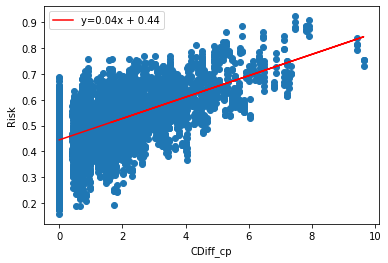

In [4]:
### C_Diff Correlation

cdiff_df = cp_correlation_df[cp_correlation_df['run'] == 'C_diff']

coefficients = np.polyfit(cdiff_df['CDiff_cp'], 
                          cdiff_df['pred'], 
                          1)
linear_fit = np.poly1d(coefficients)

plt.figure()
plt.scatter(x=cdiff_df['CDiff_cp'],
            y=cdiff_df['pred'],
           label = None)
plt.plot(cdiff_df['CDiff_cp'], 
         linear_fit(cdiff_df['CDiff_cp']), 
         color="red", 
         label=f"y={coefficients[0]:.2f}x + {coefficients[1]:.2f}")
plt.ylabel('Risk')
plt.xlabel('CDiff_cp')
plt.legend()
plt.show()

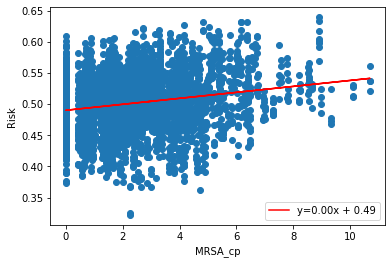

In [5]:
### MRSA Correlation

mrsa_df = cp_correlation_df[cp_correlation_df['run'] == 'MRSA']

coefficients = np.polyfit(mrsa_df['MRSA_cp'], 
                          mrsa_df['pred'], 
                          1)
linear_fit = np.poly1d(coefficients)

plt.figure()
plt.scatter(x=mrsa_df['MRSA_cp'],
            y=mrsa_df['pred'],
           label = None)
plt.plot(mrsa_df['MRSA_cp'], 
         linear_fit(mrsa_df['MRSA_cp']), 
         color="red", 
         label=f"y={coefficients[0]:.2f}x + {coefficients[1]:.2f}")
plt.ylabel('Risk')
plt.xlabel('MRSA_cp')
plt.legend()
plt.show()

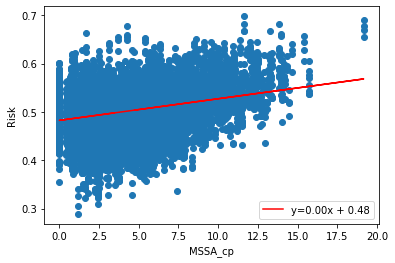

In [6]:
### MSSA Correlation

mssa_df = cp_correlation_df[cp_correlation_df['run'] == 'MSSA']

coefficients = np.polyfit(mssa_df['MSSA_cp'], 
                          mssa_df['pred'], 
                          1)
linear_fit = np.poly1d(coefficients)

plt.figure()
plt.scatter(x=mssa_df['MSSA_cp'],
            y=mssa_df['pred'],
           label=None)
plt.plot(mssa_df['MSSA_cp'], 
         linear_fit(mssa_df['MSSA_cp']), 
         color="red", 
         label=f"y={coefficients[0]:.2f}x + {coefficients[1]:.2f}")
plt.ylabel('Risk')
plt.xlabel('MSSA_cp')
plt.legend()
plt.show()